In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [62]:
import matplotlib.pyplot as plt
import streetview
from skimage import io
import numpy as np

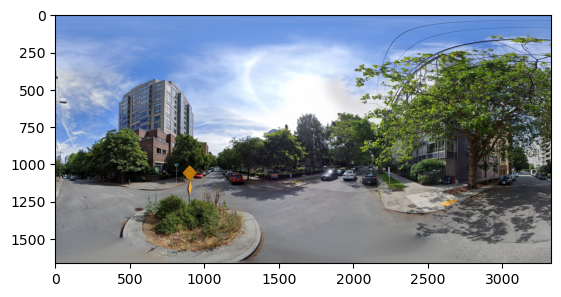

In [297]:
# panoids = streetview.panoids_byYear(lat=47.611923, lon=-122.326042,query_year = 2019, query_month=5,disp=False)
# # print(panoids)
# panoid = panoids['panoid']
# print(panoids)
panorama = streetview.download_panorama_v3('_qVKgG3dGOoClMQI6QgVRg', zoom=3, disp=False)
# io.imsave(f'samples/{panoid}.jpeg',panorama)
plt.imshow(panorama)

In [174]:
DATA_DIR = '/Users/csea/Desktop/deep-learning-final-project-project-sidewalk/data/raw/projectsidewalk/metadata_sample.xlsx'

In [175]:
import pandas as pd

In [190]:
sample_meta = pd.read_csv('sample_csv-metadata-seattle.csv')

In [191]:
sample_meta.head()

,gsv_panorama_id,sv_image_x,sv_image_y,zoom,label_type_id,photographer_heading,heading,pitch,label_id,image_width,...,tile_height,image_date,imagery_type,panorama_lat,panorama_lng,label_lat,label_lng,computation_method,copyright,scaling_factor
0,_qVKgG3dGOoClMQI6QgVRg,7186,-767,3,1,143.214005,193.879471,-21.1875,120954,16384,...,512,2019-06,1,47.611923,-122.326042,47.611860,-122.326069,approximation2,NaN,1.230769
1,_V4d4UY-GUN0w3YXbNwPFg,77,-389,1,1,88.740387,334.250000,-18.3125,121399,16384,...,512,2019-06,1,47.599171,-122.317078,47.599296,-122.317112,approximation2,NaN,1.230769
2,7nNj0FtXp4bXcUGARDOcCg,5263,-369,1,1,181.617859,118.000000,-22.0625,47125,16384,...,512,2018-10,1,47.656849,-122.313278,47.656757,-122.313179,depth,NaN,1.230769
3,7UcMxaynnWPMEWNMVqel0Q,10987,-608,1,1,358.422882,313.500000,-27.1250,95329,16384,...,512,2019-04,1,47.684982,-122.388725,47.685017,-122.388817,depth,NaN,1.230769
4,7UTcA-Aya1fMfLZ8Gk5IZA,4205,-624,1,1,176.266602,125.750000,-4.8750,46865,16384,...,512,2018-10,1,47.677582,-122.289291,47.677551,-122.289200,depth,NaN,1.230769


In [281]:
for lat,lng,zoom,date in zip(sample_meta['panorama_lat'],sample_meta['panorama_lng'],sample_meta['zoom'],sample_meta['image_date']):
    yr = int(date[:4])
    mo = int(date[-2:])
    print(yr,mo)
    try:
        panoids = streetview.panoids_byYear(lat=lat, lon=lng,query_year = yr, query_month=mo)
        panoid = panoids['panoid']
        panorama = streetview.download_panorama_v3(panoid, zoom=zoom, disp=False)
        print(panorama.shape)
        # io.imsave(f'sample_seattle/{panoid}.jpeg',panorama)
    except:
        print('skipped')
    

2019 6
(1664, 3328, 3)
2019 6
(416, 832, 3)
2018 10
(416, 832, 3)
2019 4
(416, 832, 3)
2018 10
(416, 832, 3)
2019 6
skipped


In [279]:
panorama.shape

(416, 832, 3)

In [298]:
import croppano
file = '_qVKgG3dGOoClMQI6QgVRg'
croppano.make_single_crop(f'sample_seattle/{file}.jpeg',
                            7186,
                            -767,
                            193.879471,
                            f'sample_seattle/CROPPED_{file}.png',True)

3328 1664
719.1369808878381 719.1369808878381
Plotting at 260.80799857777765,1023.75 using yaw 193.879471
